# tutorial #5:
creating a 4-layer winding

<p><img src="figure/koil_05.jpeg" width="250" align="left"/></p>
The harmonic content of the mmf winding is related to the number of layers.
Single-layer windings are characterized by a single coil in each slots.
In a two-layer winding each slots contain two coil sides.
A four-layer winding is characterized by four coil sides per slots. An example of 4-layer winding applied to an axial-flux machine is shown in the following pictures:
<p><img src="figure/AxF-01.png" width="200" align="left"/>
<p><img src="figure/AxF-02.png" width="220" align="left"/></p>

<p>
The increase of the number of layers can be used to reduce the amplitude of specific mmf harmonic. As an example, the following Figure shows the winding factor for a 12-slot 10-pole winding. On the left a 2-layer winding is considered, on the right a 4-layer winding.
It can be noted the reduced amplitude for the harmonics of the 4-layer winding (there is a slight decrease aso for the main harmonic). </p>

In [1]:
from dolomites import koil
import math
import matplotlib

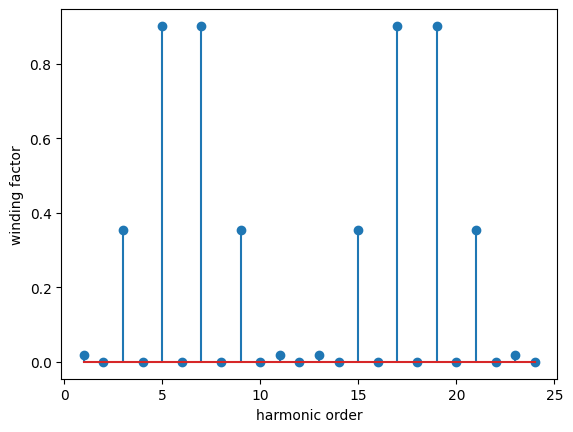

In [2]:
# Example of 4-layer winding

m = 3
Q = 12
p = 5

# we start from a 2-layer winding
w = koil.m_phase_winding()
w.compute_winding(m,Q,p)

wa = w.windings[0]
wb = w.windings[1]
wc = w.windings[2]

# and add some more coils to phase a...
wa.add_coil(koil.coil(11,12,1))
wa.add_coil(koil.coil(6,7,1))
wa.add_coil(koil.coil(12,1,-1))
wa.add_coil(koil.coil(5,6,-1))

# ...to phase b...
wb.add_coil(koil.coil(2,3,1))
wb.add_coil(koil.coil(7,8,1))
wb.add_coil(koil.coil(1,2,-1))
wb.add_coil(koil.coil(8,9,-1))

# ...and to phase c
wb.add_coil(koil.coil(10,11,1))
wb.add_coil(koil.coil(3,4,1))
wb.add_coil(koil.coil(9,10,-1))
wb.add_coil(koil.coil(4,5,-1))
    
# we compute the winding factor...
nu = []
kw = []
for _nu in range(1,25):
    nu.append(_nu)
    kw.append(wa.get_kw(_nu))

# ...and plot it
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.stem(nu,kw)
plt.xlabel('harmonic order')
plt.ylabel('winding factor');

In [3]:
kw

[0.01733758853025394,
 0,
 0.35355339059327356,
 0,
 0.901221065013438,
 0,
 0.9012210650134382,
 0,
 0.3535533905932738,
 0,
 0.017337588530255077,
 0,
 0.017337588530253478,
 0,
 0.35355339059327473,
 0,
 0.9012210650134374,
 0,
 0.9012210650134379,
 0,
 0.35355339059327245,
 0,
 0.017337588530254255,
 0]

In [4]:
sum(abs(wa.get_slot_matrix()))

5.333333333333334